In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [2]:
data=pd.read_csv("IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'sepal length vs sepal width')

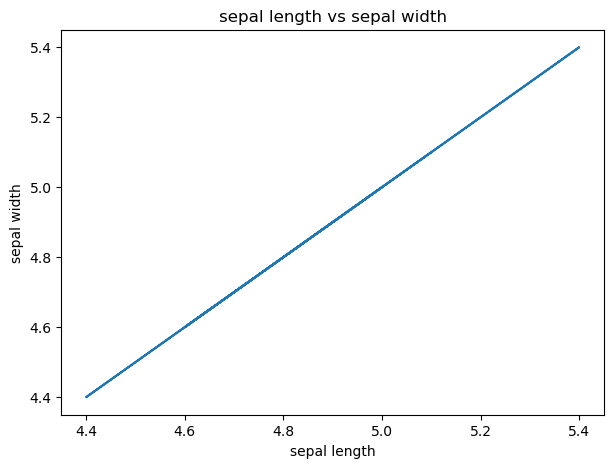

In [6]:
a=data['sepal_length'][:10]
b=data['sepal_length'][:10]
plt.figure(figsize=(7,5))
plt.plot(a,b) 
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("sepal length vs sepal width")

Text(0, 0.5, 'frequency')

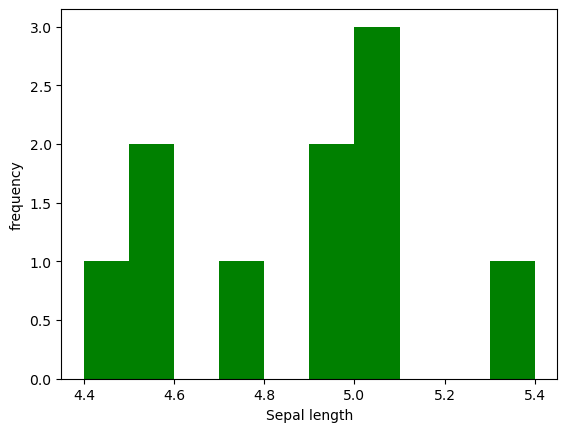

In [7]:
plt.hist(a,color="green")
plt.xlabel("Sepal length")
plt.ylabel("frequency")

In [8]:
data.shape

(150, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x215cfb53050>,
 'caps': [<matplotlib.lines.Line2D at 0x215cfcaa510>,
 'boxes': [<matplotlib.patches.PathPatch at 0x215cfc71110>],
 'medians': [<matplotlib.lines.Line2D at 0x215cfcab9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x215cfcb84d0>],
 'means': []}

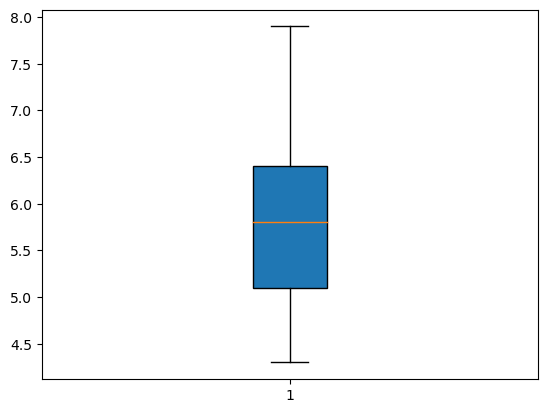

In [9]:
plt.boxplot(data['sepal_length'],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x215d053d510>,
 'caps': [<matplotlib.lines.Line2D at 0x215d054d150>,
 'boxes': [<matplotlib.patches.PathPatch at 0x215cfc51cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x215d054e510>],
 'fliers': [<matplotlib.lines.Line2D at 0x215d054efd0>],
 'means': []}

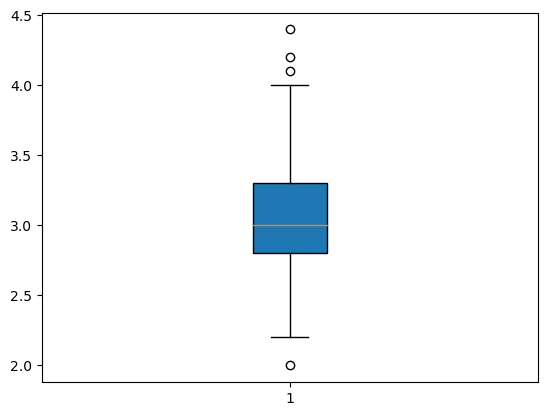

In [10]:
plt.boxplot(data['sepal_width'],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x215d05b3390>,
 'caps': [<matplotlib.lines.Line2D at 0x215d05bc7d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x215d0571290>],
 'medians': [<matplotlib.lines.Line2D at 0x215d05bddd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x215d0586810>],
 'means': []}

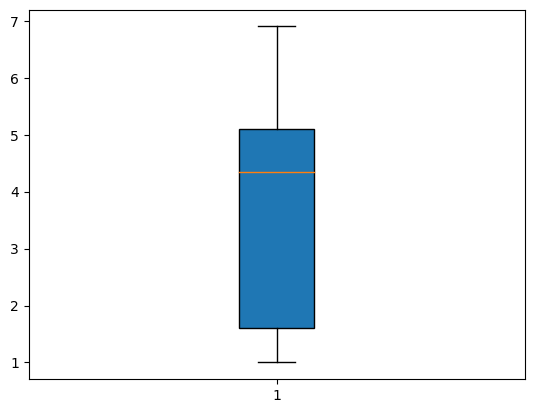

In [11]:
plt.boxplot(data['petal_length'],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x215d0615c50>,
 'caps': [<matplotlib.lines.Line2D at 0x215d0622250>,
 'boxes': [<matplotlib.patches.PathPatch at 0x215d05bee50>],
 'medians': [<matplotlib.lines.Line2D at 0x215d0623790>],
 'fliers': [<matplotlib.lines.Line2D at 0x215d05c8210>],
 'means': []}

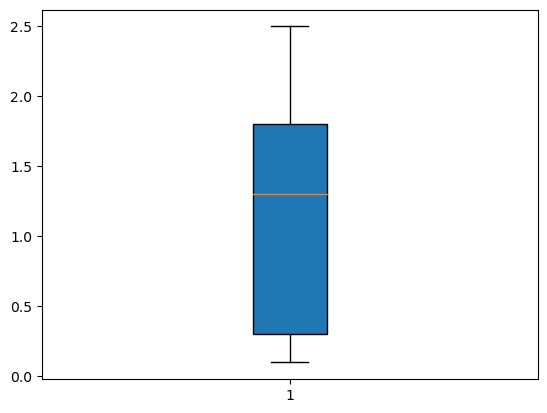

In [12]:
plt.boxplot(data['petal_width'],patch_artist=True)

In [13]:
species=LabelEncoder()
data['species']=species.fit_transform(data['species'])

In [14]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
correlation=data.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

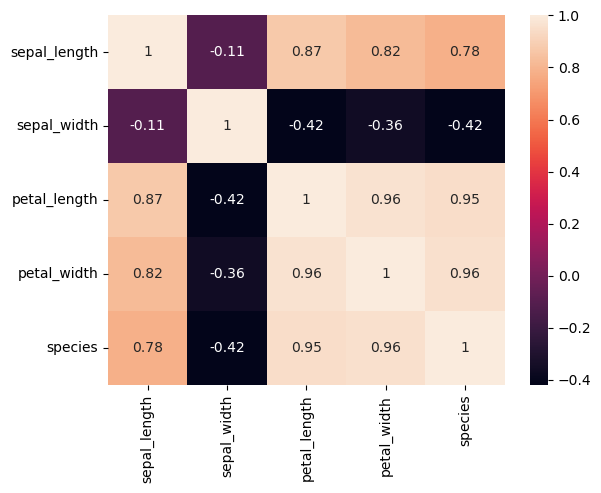

In [16]:
sns.heatmap(correlation,annot=True)

In [17]:
x=data.drop("species",axis=1)
y=data["species"]

In [18]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8,random_state=22)

In [21]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
nb=GaussianNB()

In [23]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
model.score(x_train,y_train)

0.95

In [25]:
model.score(x_test,y_test)

0.9666666666666667

In [26]:
y_pred=model.predict(x_test)

In [27]:
pd.DataFrame({"True Values":y_test, "Predicted Values":y_pred})

,True Values,Predicted Values
10,0,0
115,2,2
54,1,1
146,2,2
63,1,1
76,1,1
86,1,1
138,2,2
64,1,1
35,0,0


In [28]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [29]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 13]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

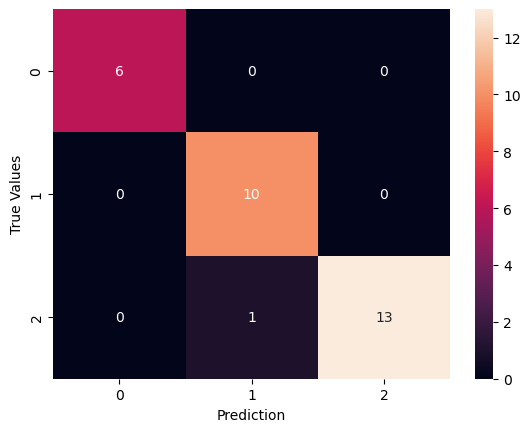

In [30]:
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("True Values")

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [32]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
